## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score
import seaborn as sns

In [2]:
def get_max_score(model, X, y):
    score = 0
    for i in range(0,100): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model.fit(X_train, y_train)
        res_score = model.score(X_test, y_test)
        if res_score > score:
            score = res_score
            randstate = i
    return f"score: {score}, random state: {randstate}"

## Data Describtion

In [3]:
df = pd.read_csv(r"D:\Study\Level 3\First term\Selected 1\Project\numerical dataset\Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.shape

(270, 14)

In [5]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

##### unique values

In [6]:
for i in df.columns:
    print(f"{i} : {len(df[i].unique())}")

Age : 41
Sex : 2
Chest pain type : 4
BP : 47
Cholesterol : 144
FBS over 120 : 2
EKG results : 3
Max HR : 90
Exercise angina : 2
ST depression : 39
Slope of ST : 3
Number of vessels fluro : 4
Thallium : 3
Heart Disease : 2


In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

## change heart disease column using LabelEncoder 
##### as 1 => have a disease, 0 => don't have a disease

In [9]:
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [10]:
X = df.drop(['Heart Disease', 'Age', 'Sex', 'FBS over 120'], axis=1)
y = df['Heart Disease']

## Data Scaling

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Logistic Regression

In [18]:
#using train_test_split Logistic Regression
lr_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
get_max_score(lr_model, X, y)

'score: 0.9444444444444444, random state: 31'

<AxesSubplot: >

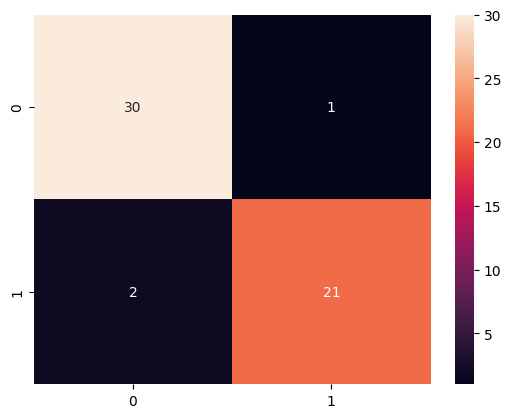

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
y_pred = lr_model.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True)

In [14]:
#using cross validation Logistic Regression
arr = cross_val_score(lr_model, X, y, cv=5)
arr.mean()

0.837037037037037

## Support Vector Machine

In [27]:
#using train_test_split SVM
svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')
get_max_score(svm, X, y)

'score: 0.9259259259259259, random state: 22'

<AxesSubplot: >

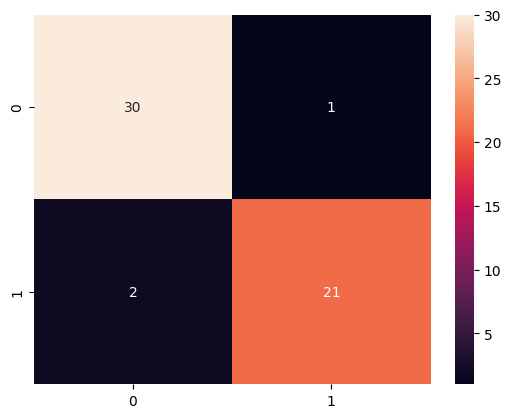

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
y_pred = svm.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True)

In [17]:
#using cross validation SVM
arr = cross_val_score(svm, X, y, cv=5)
arr.mean()

0.825925925925926